# Étude de cas 2
### Outils et méthodologies de Résolution des problèmes partie 1 
réalisé par:
* Mourad Izem
* Mehdi Hayani Mechkouri

(Questions 1-6)
#### Situation

NOLTACED est une chaîne de trois
magasins qui livre des produits
agroalimentaires frais. Après une période
de croissance rapide, NOLTACED a vu son
chiffre d'affaires baisser pendant six mois.
Le comité de direction a décidé de former
une équipe composée des directeurs des
magasins, de personnel de production et
de livreurs pour essayer de découvrir ce
qui se passait et de générer un plan
d'action pour redresser la situation.
L’équipe a suivi un standard global de
résolution des problèmes.

In [1]:
# Importation des dépendances 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib.ticker import PercentFormatter
import matplotlib.image as mpimg
from scipy import stats
from IPython.display import Image

## 1 - Cadrage du problème

### 1.1 diagramme pareto

Pour cadrer le problème, L’équipe a commencé par revoir les plaintes des clients; la société a reçu beaucoup de plaintes déposés aux six magasins entre octobre et décembre, ces données sont regroupées sous le tableau suivant:

In [2]:
defauts = pd.read_excel("data/défauts.xlsx", index_col=0)
defauts.transpose()

défaut,Quantité non respectées,Mauvais goût,Retard de la livraison,Saletés,Aliments pas frais,autres
Qt,300,150,1900,200,1400,100


On décide d'utiliser le diagramme pareto pour identifier les problèmes majeurs.

In [3]:
defauts = defauts.sort_values(by=["Qt"], ascending=False)
pareto = defauts.copy()
vals_sum = pareto.sum()
pareto["fréquence"] = (pareto["Qt"] / vals_sum["Qt"])*100
vals = pareto["fréquence"].cumsum()
pareto["cumul"] = vals
pareto

,Qt,fréquence,cumul
défaut,,,
Retard de la livraison,1900,46.913580,46.913580
Aliments pas frais,1400,34.567901,81.481481
Quantité non respectées,300,7.407407,88.888889
Saletés,200,4.938272,93.827160
Mauvais goût,150,3.703704,97.530864
autres,100,2.469136,100.000000


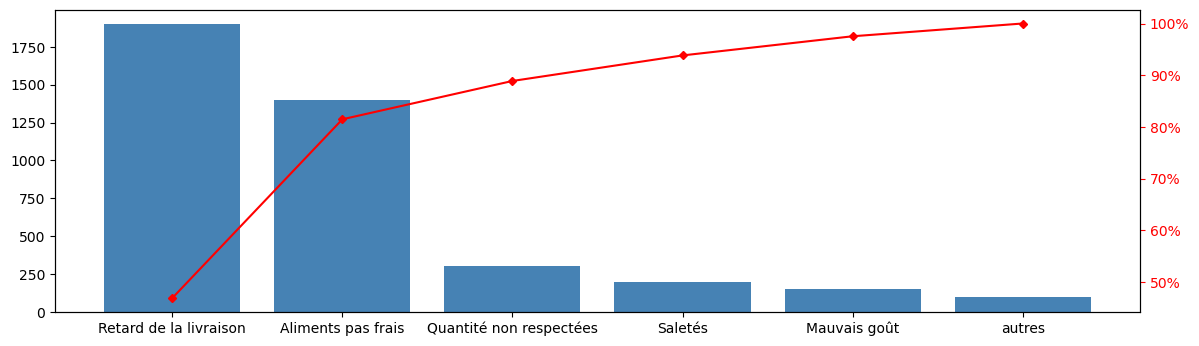

In [4]:
fig, ax = plt.subplots()
fig.set_dpi(100)

fig.set_size_inches(14, 4)
ax.bar(pareto.index, pareto['Qt'], color='steelblue')
ax2 = ax.twinx()
ax2.plot(pareto.index, pareto['cumul'], marker="D", ms=4, color="red")

ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y')
ax2.tick_params(axis='y', colors="red")

plt.show()

### 1.2 Conclusion

Le retard et la dégradation de la fraîcheur du produit représentent 81.48% des plaintes, nous choisissons alors de nous focaliser sur ces deux problèmes.

NB : La dégradation de la fraîcheur du produit peut être causée par le retard de la livraison la réduction du temps de livraison peut alors résoudre ces deux problèmes au même temps, mais vu qu'on a pas suffisamment d'informations nous décidons de traiter chacun d'eux séparément.

## 2 - Formalisation du problème 

Afin de bien définir le problème "Retard de la livraison" d'une manière claire, nous utiliserons l'outil QQOQCCP.

### <font color='blue'>Quoi ?</font> 
•	Il s’agit d’un retard de livraison<br>
•	La majorité des plaintes Clients sont dues à la livraison tardive<br>
•	Les conséquences : dégradation de la qualité du produit | mécontentement des clients | détérioration de l'image du produit ou de l'entreprise NOLTACED<br>
•	Les risques : pénalités | maladies des clients à cause des produits non frais | retour client et perte de l’entreprise <br>

### <font color='blue'>Qui?</font> 

•	l'entreprise NOLTACED

### <font color='blue'>Où ? </font> 

- Magasin de stockage <br>
- Chaîne de production (usine)<br>
- Route …<br>

### <font color='blue'>Quand ?</font> 

- La période Juillet – Décembre<br>
- Plus de six mois <br>
- Au début de la saison d’été<br>  


### <font color='blue'>Comment ?</font> 


- Ce problème se manifeste par la diminution des commandes clients <br>
- Augmentation du nombre de réclamations clients<br>
- Les actions des protagonistes : formation d’une équipe des directeurs des magasins, du personnel de production, des livreurs… pour générer un plan d’action <br>
- Les procédures : étudier les plaintes clients et les classifier en catégories<br>

### <font color='blue'>Combien ?</font> 


- 1900 réclamations à propos de la livraison tardive <br> 
- Retard de livraison | délai qui dépasse les 3 jours <br>  

### <font color='blue'>Pourquoi ?</font> 


- Les causes racines à définir

## 3 - les estimations de tendance et de variabilité

### 3.1 Historique

Une recherche au niveau de l'historique de livraison nous a permis de recueillir les données suivantes.

In [5]:
data = pd.read_excel('data/délai de liv.xlsx', index_col=0).reset_index()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
délai de livraison,4.9,3.6,3.2,3.6,2.2,2.5,2.3,4.1,5.9,6.0,...,1.5,2.1,5.9,4.3,4.2,4.6,2.9,3.1,3.3,3.5


In [6]:
mean = data['délai de livraison '].mean()
ect = data['délai de livraison '].std()
median_value = np.percentile(data['délai de livraison '], 50) 
R = max(data['délai de livraison ']) - min(data['délai de livraison '])
print("la moyenne = ",mean)
print("l'écart-type = ",ect)
print("la médiane = ",median_value)
print("l'étendu = ",R)

la moyenne =  3.5239999999999996
l'écart-type =  1.2859108315379673
la médiane =  3.5
l'étendu =  5.0


## <font color='green'>$ \bar{X}= 3.524 \ \ | \ \ Me = 3.5 \ \ |\ \ \sigma = 1.286 \ \ | \ \ R = 5.0 $</font> 


### 3.2 Conclusion

Une moyenne de livraison de 3.5 est très importante, en effet un client tolère un retard maximal de 3.<br>
la médiane de 3.5 montre que plus de la moitié de nos livraisons sont en retard.<br>
$\ \sigma = 1.286\ \ $, R = 5.0 indiquent une très forte variabilité du processus de livraison.

## 4 - Traçage des données 

### 4.1 Visualisation

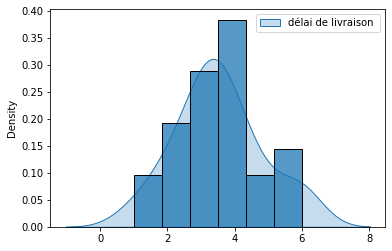

In [7]:
sns.histplot(data=data, stat='density')
ax = sns.kdeplot(data=data, fill=True)

On remarque que cette distribution a un tendance normale, on procedera par la suite à un test de normalité.

### 4.2 Teste de normalité

In [8]:
sp = stats.shapiro(data)
p_value = sp.pvalue
print(p_value) 

0.46091851592063904


## <font color='green'>$ p\_value = 0.461 $</font> 

### 4.3 Conclusion

Avec une p-value de 0.461 on peut alors dire que le délai de livraison suit une loi normale.

## 5 - récapitulatif  

On déduit des sections précédentes :
-	La distribution du délai de livraison suit la loi normale 
-	La médiane vaut 3.5 alors plus de 50% de nos commandes sont en retard 
-	Std = 1.286 ; R = 5, grande dispersion  


## 6 - Objectif à atteindre

On cherche alors à définir une moyenne et un écart-type qui permettront de satisfaire le client
soit retrouver {$\bar{X}\ \ ,\ \sigma\ \ $}<br> 
tq $ \bar{X}\ + 3\ \sigma  ≤ 3\ $ <br>
nous fixons $ \bar{X} \ $ = 2 on retrouve alors $ \sigma \$ = 1/3

In [9]:
f = lambda x : (1/(sigma_std*np.sqrt(2*np.pi))) * (np.exp(-((x-x_bar)**2)/(2*(sigma_std)**2)))

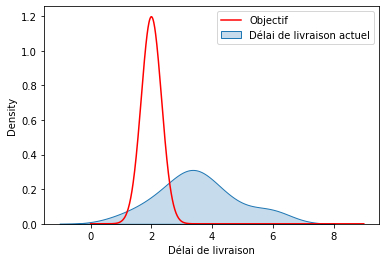

In [10]:
x_bar = 2
sigma_std = 1/3
delai_opt = [f(x) for x in np.arange(0,9,0.01)]
plt.plot(np.arange(0,9,0.01), delai_opt , label='Objectif', c="r")
ax = sns.kdeplot(data=data, fill=True, label="Délai de livraison actuel")
plt.xlabel("Délai de livraison")
plt.legend()
plt.show()

## 7 - Fishbone diagram

Afin de classer et de visualiser les causes du la livraison tardive, nous utiliserons <b class="term">le diagramme d'Ishikawa </b>(Fishbone diagram) <b class="term">5M</b>.

<!--<img style="border:1px dashed DarkSlateBlue;  border-radius: 15px;"  src=".\data\Fishbone.png" width = 800 height =800>-->

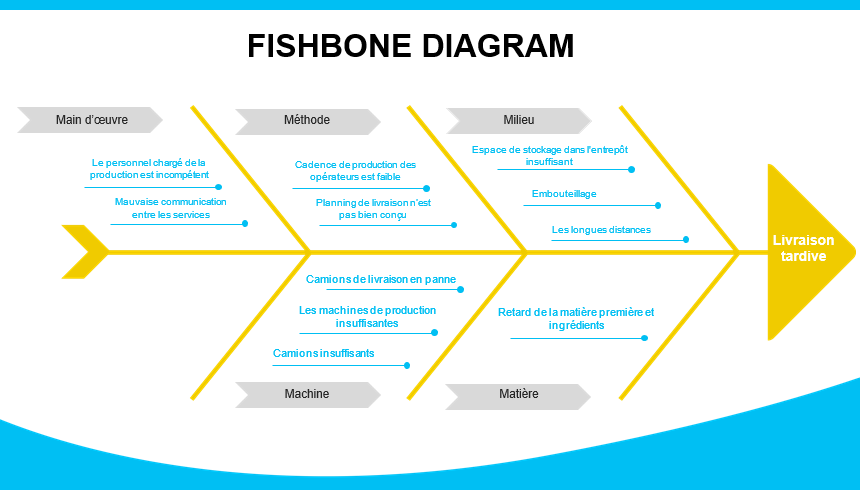